# YouTube · 2024 Ucrania · Search mensual con **reanudación** (v7-fix)

Este notebook fuerza el uso de la 4ª key por defecto y ofrece resume por canal/mes/pageToken.


In [1]:
import os, json
import pandas as pd

OUT_DIR = "./data_rebuild"
COMMENTS_TMP = os.path.join(OUT_DIR, "comments_top_level_refinado_tmp.csv")
STATE_CMT    = os.path.join(OUT_DIR, "comments_state_refinado.json")
F_VIDEOS     = os.path.join(OUT_DIR, "videos_meta_cache_refinado.csv")

# --- cargar archivos si existen ---
df_meta = pd.read_csv(F_VIDEOS) if os.path.exists(F_VIDEOS) else pd.DataFrame()
df_cmt  = pd.read_csv(COMMENTS_TMP) if os.path.exists(COMMENTS_TMP) else pd.DataFrame()
state   = json.load(open(STATE_CMT, "r", encoding="utf-8")) if os.path.exists(STATE_CMT) else {}

total_videos = len(df_meta) if not df_meta.empty else 0
done_videos  = len(set(state.get("done_video_ids", [])))
in_progress  = len((state.get("page_tokens") or {}).keys())
covered_videos = df_cmt["channel_id"].notna().sum() and df_cmt["channel_id"].nunique()

print("=== PROGRESO ===")
print(f"- Videos totales (discovery): {total_videos}")
print(f"- Videos completados (state.done_video_ids): {done_videos}")
print(f"- Video(s) con paginación pendiente: {in_progress}")
print(f"- Videos con ≥1 comentario descargado (observado): {covered_videos or 0}")
print(f"- Comentarios descargados (rows): {len(df_cmt)}")
print()

# lista rápida de videos aún no completados (ids)
if total_videos:
    all_vids = set(df_meta["video_id"].astype(str))
    done_set = set(state.get("done_video_ids", []))
    remaining = list(all_vids - done_set)
    print(f"- Quedan por terminar: {len(remaining)} videos")
    # muestra algunos ejemplos
    print("  Ejemplos:", remaining[:10])


=== PROGRESO ===
- Videos totales (discovery): 0
- Videos completados (state.done_video_ids): 864
- Video(s) con paginación pendiente: 0
- Videos con ≥1 comentario descargado (observado): 8
- Comentarios descargados (rows): 371740



In [2]:
if not df_cmt.empty:
    # por canal (usamos channel_title y condiciones_cuenta, si están en el CSV temporal)
    grp_channel = (df_cmt
                   .groupby(["channel_id","channel_title","condiciones_cuenta"], dropna=False)
                   .size()
                   .reset_index(name="n_comments")
                   .sort_values("n_comments", ascending=False))
    display(grp_channel.head(20))

    # por bloque
    grp_bloque = (df_cmt
                  .groupby(["condiciones_cuenta"], dropna=False)
                  .size()
                  .reset_index(name="n_comments")
                  .sort_values("n_comments", ascending=False))
    display(grp_bloque)

    # top videos por nº de comentarios hasta ahora
    grp_video = (df_cmt
                 .groupby(["channel_id","channel_title","video_title","video_published_at"], dropna=False)
                 .size()
                 .reset_index(name="n_comments")
                 .sort_values("n_comments", ascending=False))
    display(grp_video.head(20))
else:
    print("No hay aún comentarios en COMMENTS_TMP; ejecutá otra tanda de extracción y reintentá.")


,channel_id,channel_title,condiciones_cuenta,n_comments
1,UCBQnW5_C-6Ns6bob5ozacZg,Liu Sivaya,pro-ruso,218032
4,UCJQQVLyM6wtPleV4wFBK06g,VisualPolitik,pro-ucraniano,77591
5,UCPH3Oz99Y_jrVBCQMjQZNSg,Memorias de Pez,pro-ucraniano,46726
0,UC7QZIf0dta-XPXsp9Hv4dTw,RTVE Noticias,noticiero,20958
7,UCnsvJeZO4RigQ898WdDNoBw,EL PAÍS,noticiero,6813
6,UClLLRs_mFTsNT5U-DqTYAGg,La Vanguardia,noticiero,1201
3,UCGXbLrVe8vnkiFv7q2vYv3w,El Mundo,noticiero,298
2,UCCJs5mITIqxqJGeFjt9N1Mg,laSexta Noticias,noticiero,121


,condiciones_cuenta,n_comments
1,pro-ruso,218032
2,pro-ucraniano,124317
0,noticiero,29391


,channel_id,channel_title,video_title,video_published_at,n_comments
604,UCJQQVLyM6wtPleV4wFBK06g,VisualPolitik,Así es como RUSIA puede ATACAR la OTAN - Visua...,2024-03-05T19:00:06Z,6120
640,UCJQQVLyM6wtPleV4wFBK06g,VisualPolitik,¿Ha perdido UCRANIA la GUERRA? - VisualPolitik,2024-01-30T19:57:24Z,4808
616,UCJQQVLyM6wtPleV4wFBK06g,VisualPolitik,El EJÉRCITO de UCRANIA está invadiendo RUSIA ...,2024-08-08T17:57:37Z,4338
572,UCBQnW5_C-6Ns6bob5ozacZg,Liu Sivaya,‼️ ÚLTIMA HORA: Vladimir Putin cambia al Minis...,2024-05-12T21:40:35Z,3894
646,UCJQQVLyM6wtPleV4wFBK06g,VisualPolitik,¿Por qué el ISIS está atacando RUSIA? - Visual...,2024-03-24T17:42:43Z,3878
550,UCBQnW5_C-6Ns6bob5ozacZg,Liu Sivaya,¿VUELVO A RUSIA? LA NOTICIA MÁS IMPORTANTE (y ...,2024-09-26T18:30:46Z,3490
852,UCnsvJeZO4RigQ898WdDNoBw,EL PAÍS,Putin prefiere que Biden gane las elecciones d...,2024-02-15T12:20:11Z,3175
620,UCJQQVLyM6wtPleV4wFBK06g,VisualPolitik,Entrevista completa en ESPAÑOL a VLADÍMIR PUTI...,2024-02-09T16:14:30Z,2702
466,UCBQnW5_C-6Ns6bob5ozacZg,Liu Sivaya,SE ME SALTAN LAS LÁGRIMAS: SOLDADOS UCRANIANOS...,2024-08-24T15:49:20Z,2666
488,UCBQnW5_C-6Ns6bob5ozacZg,Liu Sivaya,TREMENDO BOCHORNO DE LAS OLIMPIADAS: EN RUSIA ...,2024-07-27T15:05:22Z,2664


In [7]:
if not df_meta.empty and not df_cmt.empty:
    vids_hay = df_cmt[["channel_id"]].copy()
    vids_hay["has_comments"] = 1
    vids_hay = pd.concat([df_cmt[["channel_id"]].assign(video_id=df_cmt.get("video_id", pd.NA)),
                          df_cmt[["channel_id","video_title"]].assign(video_id=df_cmt.get("video_id", pd.NA))], axis=0)  # fallback si no guardaste video_id en cmt

    # Si guardaste `video_id` en df_cmt, usalo directamente; si no, mapeamos por título (menos fiable)
    if "video_id" in df_cmt.columns:
        vids_hay = (df_cmt[["channel_id","video_id"]]
                    .dropna()
                    .drop_duplicates()
                    .assign(has_comments=1))
        cobertura = (df_meta[["channel_id","channel_title","video_id"]]
                     .merge(vids_hay, on=["channel_id","video_id"], how="left")
                     .assign(has_comments=lambda d: d["has_comments"].fillna(0).astype(int))
                     .groupby(["channel_id","channel_title"], as_index=False)
                     .agg(videos_total=("video_id","nunique"),
                          videos_con_com=("has_comments","sum")))
    else:
        # Fallback por título (por si tu CSV temporal de comentarios aún no incluía video_id)
        vids_hay = (df_cmt[["channel_id","video_title"]]
                    .dropna()
                    .drop_duplicates()
                    .assign(has_comments=1))
        cobertura = (df_meta[["channel_id","channel_title","video_title"]]
                     .merge(vids_hay, on=["channel_id","video_title"], how="left")
                     .assign(has_comments=lambda d: d["has_comments"].fillna(0).astype(int))
                     .groupby(["channel_id","channel_title"], as_index=False)
                     .agg(videos_total=("video_title","nunique"),
                          videos_con_com=("has_comments","sum")))

    cobertura["pct_cubierto"] = (100.0 * cobertura["videos_con_com"] / cobertura["videos_total"]).round(1)
    cobertura = cobertura.sort_values(["pct_cubierto","videos_con_com"], ascending=[False, False])
    display(cobertura.head(20))
else:
    print("Necesito df_meta y df_cmt para calcular cobertura por canal.")


,channel_id,channel_title,videos_total,videos_con_com,pct_cubierto
3,UCGXbLrVe8vnkiFv7q2vYv3w,El Mundo,14,10,71.4
4,UCJQQVLyM6wtPleV4wFBK06g,VisualPolitik,52,30,57.7
10,UCwd8Byi93KbnsYmCcKLExvQ,Negocios TV,2,1,50.0
7,UCgms7r9SaeYhuIBaPGOjnhw,Miguel Ruiz Calvo,881,397,45.1
6,UCPH3Oz99Y_jrVBCQMjQZNSg,Memorias de Pez,94,40,42.6
8,UClLLRs_mFTsNT5U-DqTYAGg,La Vanguardia,24,10,41.7
9,UCnsvJeZO4RigQ898WdDNoBw,EL PAÍS,85,35,41.2
1,UCBQnW5_C-6Ns6bob5ozacZg,Liu Sivaya,580,238,41.0
0,UC7QZIf0dta-XPXsp9Hv4dTw,RTVE Noticias,156,62,39.7
5,UCNKomgId0-uTA-vVLM9v1pw,Intereconomía,198,58,29.3


In [9]:
df_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2099 entries, 0 to 2098
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   channel_id          2099 non-null   object 
 1   bloque              2099 non-null   object 
 2   video_id            2099 non-null   object 
 3   video_title         2099 non-null   object 
 4   channel_title       2099 non-null   object 
 5   video_published_at  2099 non-null   object 
 6   video_views         2099 non-null   int64  
 7   video_likes         2099 non-null   int64  
 8   video_duration      2099 non-null   float64
 9   video_tags          2070 non-null   object 
 10  video_category_id   2099 non-null   int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 180.5+ KB


In [12]:
# ---- FIX: añadir condiciones_cuenta a df_meta si no está ----
if "condiciones_cuenta" not in df_meta.columns:
    try:
        # canales_interes: Dict[channel_id -> 'pro-ruso' / 'noticiero' / 'pro-ucraniano']
        cond_map = dict(canales_interes)  # usa tu dict ya cargado
    except NameError:
        # fallback seguro (si no existe canales_interes en este notebook)
        cond_map = {}

    df_meta = df_meta.copy()
    df_meta["condiciones_cuenta"] = df_meta["channel_id"].map(cond_map).fillna("desconocido")


In [13]:
# 1) asegurar columna
if "condiciones_cuenta" not in df_meta.columns:
    cond_map = dict(canales_interes) if "canales_interes" in globals() else {}
    df_meta = df_meta.copy()
    df_meta["condiciones_cuenta"] = df_meta["channel_id"].map(cond_map).fillna("desconocido")

# 2) agregados + ratios
import numpy as np
meta_by_channel = (df_meta
    .groupby(["channel_id","channel_title","condiciones_cuenta"], dropna=False)
    .agg(
        videos_2024=("video_id", "nunique"),
        views_sum=("video_views", lambda s: pd.to_numeric(s, errors="coerce").fillna(0).sum()),
        likes_sum=("video_likes", lambda s: pd.to_numeric(s, errors="coerce").fillna(0).sum()),
        duration_sum_sec=("video_duration", lambda s: pd.to_numeric(s, errors="coerce").fillna(0).sum())
    )
    .reset_index()
)

comments_by_channel = (df_cmt
    .groupby(["channel_id","channel_title"], dropna=False)
    .size()
    .reset_index(name="comments_total")
)

chan = (meta_by_channel
    .merge(comments_by_channel, on=["channel_id","channel_title"], how="left")
    .assign(comments_total=lambda d: d["comments_total"].fillna(0).astype(int))
)

chan["comments_per_video"]       = (chan["comments_total"] / np.where(chan["videos_2024"]>0, chan["videos_2024"], np.nan)).round(2)
chan["comments_per_100k_views"]  = (chan["comments_total"] / np.where(chan["views_sum"]>0, chan["views_sum"]/100000.0, np.nan)).round(2)
chan["comments_per_1k_likes"]    = (chan["comments_total"] / np.where(chan["likes_sum"]>0, chan["likes_sum"]/1000.0, np.nan)).round(2)
chan["comments_per_hour_video"]  = (chan["comments_total"] / np.where(chan["duration_sum_sec"]>0, chan["duration_sum_sec"]/3600.0, np.nan)).round(2)

cols_show = [
    "channel_title","condiciones_cuenta","videos_2024",
    "views_sum","likes_sum","duration_sum_sec",
    "comments_total","comments_per_video","comments_per_100k_views",
    "comments_per_1k_likes","comments_per_hour_video","channel_id"
]
display(chan.sort_values(
    ["comments_per_100k_views","comments_per_1k_likes","comments_per_video","comments_total"],
    ascending=False
)[cols_show].head(20))


,channel_title,condiciones_cuenta,videos_2024,views_sum,likes_sum,duration_sum_sec,comments_total,comments_per_video,comments_per_100k_views,comments_per_1k_likes,comments_per_hour_video,channel_id
3,El Mundo,desconocido,16,71900,1230,3546.0,192,12.00,267.04,156.10,194.92,UCGXbLrVe8vnkiFv7q2vYv3w
1,Liu Sivaya,desconocido,580,48358185,4902344,418563.0,124545,214.73,257.55,25.41,1071.19,UCBQnW5_C-6Ns6bob5ozacZg
10,Negocios TV,desconocido,2,66418,2162,1758.0,118,59.00,177.66,54.58,241.64,UCwd8Byi93KbnsYmCcKLExvQ
8,La Vanguardia,desconocido,27,494290,7292,35532.0,854,31.63,172.77,117.11,86.52,UClLLRs_mFTsNT5U-DqTYAGg
7,Miguel Ruiz Calvo,desconocido,886,174265888,11951045,1931352.0,273584,308.79,156.99,22.89,509.95,UCgms7r9SaeYhuIBaPGOjnhw
4,VisualPolitik,desconocido,53,30416995,1147891,62730.0,40619,766.40,133.54,35.39,2331.08,UCJQQVLyM6wtPleV4wFBK06g
0,RTVE Noticias,desconocido,156,5857958,75091,356049.0,7813,50.08,133.37,104.05,79.00,UC7QZIf0dta-XPXsp9Hv4dTw
6,Memorias de Pez,desconocido,94,22219391,1195059,114965.0,21642,230.23,97.40,18.11,677.69,UCPH3Oz99Y_jrVBCQMjQZNSg
5,Intereconomía,desconocido,198,4702991,170089,25224.0,1674,8.45,35.59,9.84,238.92,UCNKomgId0-uTA-vVLM9v1pw
9,EL PAÍS,desconocido,85,4310410,122191,43725.0,1357,15.96,31.48,11.11,111.73,UCnsvJeZO4RigQ898WdDNoBw


In [10]:
import pandas as pd
import numpy as np

assert not df_meta.empty, "df_meta está vacío"
assert not df_cmt.empty,  "df_cmt está vacío"

# --- agregados por canal desde META (sumas y nº de vídeos) ---
meta_by_channel = (df_meta
    .groupby(["channel_id","channel_title","condiciones_cuenta"], dropna=False)
    .agg(
        videos_2024=("video_id", "nunique"),
        views_sum=("video_views", lambda s: pd.to_numeric(s, errors="coerce").fillna(0).sum()),
        likes_sum=("video_likes", lambda s: pd.to_numeric(s, errors="coerce").fillna(0).sum()),
        duration_sum_sec=("video_duration", lambda s: pd.to_numeric(s, errors="coerce").fillna(0).sum())
    )
    .reset_index()
)

# --- comentarios por canal desde COMMENTS ---
comments_by_channel = (df_cmt
    .groupby(["channel_id","channel_title"], dropna=False)
    .size()
    .reset_index(name="comments_total")
)

# --- merge ---
chan = (meta_by_channel
    .merge(comments_by_channel, on=["channel_id","channel_title"], how="left")
    .assign(comments_total=lambda d: d["comments_total"].fillna(0).astype(int))
)

# --- ratios (evitar div/0) ---
eps = 1e-9
chan["comments_per_video"]       = (chan["comments_total"] / np.where(chan["videos_2024"]>0, chan["videos_2024"], np.nan)).round(2)
chan["comments_per_100k_views"]  = (chan["comments_total"] / np.where(chan["views_sum"]>0, chan["views_sum"]/100000.0, np.nan)).round(2)
chan["comments_per_1k_likes"]    = (chan["comments_total"] / np.where(chan["likes_sum"]>0, chan["likes_sum"]/1000.0, np.nan)).round(2)
chan["comments_per_hour_video"]  = (chan["comments_total"] / np.where(chan["duration_sum_sec"]>0, chan["duration_sum_sec"]/3600.0, np.nan)).round(2)

# ordenar por "intensidad" de comentarios vs exposición
ranked = chan.sort_values(
    ["comments_per_100k_views","comments_per_1k_likes","comments_per_video","comments_total"],
    ascending=False
).reset_index(drop=True)

cols_show = [
    "channel_title","condiciones_cuenta","videos_2024",
    "views_sum","likes_sum","duration_sum_sec",
    "comments_total","comments_per_video","comments_per_100k_views",
    "comments_per_1k_likes","comments_per_hour_video","channel_id"
]
display(ranked[cols_show].head(20))


KeyError: 'condiciones_cuenta'

In [11]:
bloque = (chan
    .groupby("condiciones_cuenta", dropna=False)
    .agg(
        canales=("channel_id","nunique"),
        videos_2024=("videos_2024","sum"),
        views_sum=("views_sum","sum"),
        likes_sum=("likes_sum","sum"),
        duration_sum_sec=("duration_sum_sec","sum"),
        comments_total=("comments_total","sum")
    )
    .reset_index()
)

bloque["comments_per_video"]      = (bloque["comments_total"] / np.where(bloque["videos_2024"]>0, bloque["videos_2024"], np.nan)).round(2)
bloque["comments_per_100k_views"] = (bloque["comments_total"] / np.where(bloque["views_sum"]>0, bloque["views_sum"]/100000.0, np.nan)).round(2)
bloque["comments_per_1k_likes"]   = (bloque["comments_total"] / np.where(bloque["likes_sum"]>0, bloque["likes_sum"]/1000.0, np.nan)).round(2)
bloque["comments_per_hour_video"] = (bloque["comments_total"] / np.where(bloque["duration_sum_sec"]>0, bloque["duration_sum_sec"]/3600.0, np.nan)).round(2)

display(bloque.sort_values("comments_per_100k_views", ascending=False))


NameError: name 'chan' is not defined

In [16]:
import os
from typing import Dict
from dotenv import load_dotenv

canales_interes: Dict[str, str] = {
    'UCPH3Oz99Y_jrVBCQMjQZNSg': 'pro-ucraniano',
    'UCJQQVLyM6wtPleV4wFBK06g': 'pro-ucraniano',
    'UCnsvJeZO4RigQ898WdDNoBw': 'noticiero',
    'UC7QZIf0dta-XPXsp9Hv4dTw': 'noticiero',
    'UClLLRs_mFTsNT5U-DqTYAGg': 'noticiero',
    'UCGXbLrVe8vnkiFv7q2vYv3w': 'noticiero',
    'UCCJs5mITIqxqJGeFjt9N1Mg': 'noticiero',
    'UCwd8Byi93KbnsYmCcKLExvQ': 'pro-ruso',
    'UCgms7r9SaeYhuIBaPGOjnhw': 'pro-ruso',
    'UCNKomgId0-uTA-vVLM9v1pw': 'pro-ruso',
    'UCBQnW5_C-6Ns6bob5ozacZg': 'pro-ruso'
}


In [17]:
import pandas as pd
import numpy as np

# --- 0) sanity checks ---
assert 'channel_id' in df_meta.columns and 'video_id' in df_meta.columns, "df_meta debe tener channel_id y video_id"
assert {'video_views','video_likes','video_duration'} <= set(df_meta.columns), "faltan columnas en df_meta"
assert {'channel_id','channel_title'} <= set(df_cmt.columns), "df_cmt debe tener channel_id y channel_title"

# --- 1) mapear condiciones_cuenta desde el diccionario (sin 'desconocido') ---
cond_map = dict(canales_interes)  # tu dict pegado arriba
meta_ids = set(df_meta['channel_id'].astype(str).unique())
missing = sorted(meta_ids - set(cond_map.keys()))

if missing:
    raise ValueError(
        "Hay channel_id en df_meta sin mapeo en 'canales_interes'. "
        f"Agrega estos IDs al dict: {missing}"
    )

df_meta = df_meta.copy()
df_meta['condiciones_cuenta'] = df_meta['channel_id'].map(cond_map)

# --- 2) agregados por canal desde META (sumas y nº de vídeos) ---
meta_by_channel = (df_meta
    .groupby(['channel_id','channel_title','condiciones_cuenta'], dropna=False)
    .agg(
        videos_2024 = ('video_id', 'nunique'),
        views_sum   = ('video_views',  lambda s: pd.to_numeric(s, errors='coerce').fillna(0).sum()),
        likes_sum   = ('video_likes',  lambda s: pd.to_numeric(s, errors='coerce').fillna(0).sum()),
        duration_sum_sec = ('video_duration', lambda s: pd.to_numeric(s, errors='coerce').fillna(0).sum())
    )
    .reset_index()
)

# --- 3) comentarios por canal desde COMMENTS ---
comments_by_channel = (df_cmt
    .groupby(['channel_id','channel_title'], dropna=False)
    .size()
    .reset_index(name='comments_total')
)

# --- 4) merge y ratios ---
chan = (meta_by_channel
    .merge(comments_by_channel, on=['channel_id','channel_title'], how='left')
    .assign(comments_total=lambda d: d['comments_total'].fillna(0).astype(int))
)

chan['comments_per_video']       = (chan['comments_total'] / np.where(chan['videos_2024']>0, chan['videos_2024'], np.nan)).round(2)
chan['comments_per_100k_views']  = (chan['comments_total'] / np.where(chan['views_sum']>0,  chan['views_sum']/100000.0, np.nan)).round(2)
chan['comments_per_1k_likes']    = (chan['comments_total'] / np.where(chan['likes_sum']>0,  chan['likes_sum']/1000.0,   np.nan)).round(2)
chan['comments_per_hour_video']  = (chan['comments_total'] / np.where(chan['duration_sum_sec']>0, chan['duration_sum_sec']/3600.0, np.nan)).round(2)

cols_show = [
    'channel_title','condiciones_cuenta','videos_2024',
    'views_sum','likes_sum','duration_sum_sec',
    'comments_total','comments_per_video','comments_per_100k_views',
    'comments_per_1k_likes','comments_per_hour_video','channel_id'
]

chan_ranked = chan.sort_values(
    ['comments_per_100k_views','comments_per_1k_likes','comments_per_video','comments_total'],
    ascending=False
).reset_index(drop=True)

display(chan_ranked[cols_show].head(20))  # vista rápida; quita .head(20) si quieres completo

# --- 5) resumen por bloque (condiciones_cuenta) ---
bloque = (chan
    .groupby('condiciones_cuenta', dropna=False)
    .agg(
        canales=('channel_id','nunique'),
        videos_2024=('videos_2024','sum'),
        views_sum=('views_sum','sum'),
        likes_sum=('likes_sum','sum'),
        duration_sum_sec=('duration_sum_sec','sum'),
        comments_total=('comments_total','sum')
    )
    .reset_index()
)

bloque['comments_per_video']      = (bloque['comments_total'] / np.where(bloque['videos_2024']>0, bloque['videos_2024'], np.nan)).round(2)
bloque['comments_per_100k_views'] = (bloque['comments_total'] / np.where(bloque['views_sum']>0, bloque['views_sum']/100000.0, np.nan)).round(2)
bloque['comments_per_1k_likes']   = (bloque['comments_total'] / np.where(bloque['likes_sum']>0, bloque['likes_sum']/1000.0,   np.nan)).round(2)
bloque['comments_per_hour_video'] = (bloque['comments_total'] / np.where(bloque['duration_sum_sec']>0, bloque['duration_sum_sec']/3600.0, np.nan)).round(2)

display(bloque.sort_values('comments_per_100k_views', ascending=False))


,channel_title,condiciones_cuenta,videos_2024,views_sum,likes_sum,duration_sum_sec,comments_total,comments_per_video,comments_per_100k_views,comments_per_1k_likes,comments_per_hour_video,channel_id
0,El Mundo,noticiero,16,71900,1230,3546.0,192,12.00,267.04,156.10,194.92,UCGXbLrVe8vnkiFv7q2vYv3w
1,Liu Sivaya,pro-ruso,580,48358185,4902344,418563.0,124545,214.73,257.55,25.41,1071.19,UCBQnW5_C-6Ns6bob5ozacZg
2,Negocios TV,pro-ruso,2,66418,2162,1758.0,118,59.00,177.66,54.58,241.64,UCwd8Byi93KbnsYmCcKLExvQ
3,La Vanguardia,noticiero,27,494290,7292,35532.0,854,31.63,172.77,117.11,86.52,UClLLRs_mFTsNT5U-DqTYAGg
4,Miguel Ruiz Calvo,pro-ruso,886,174265888,11951045,1931352.0,273584,308.79,156.99,22.89,509.95,UCgms7r9SaeYhuIBaPGOjnhw
5,VisualPolitik,pro-ucraniano,53,30416995,1147891,62730.0,40619,766.40,133.54,35.39,2331.08,UCJQQVLyM6wtPleV4wFBK06g
6,RTVE Noticias,noticiero,156,5857958,75091,356049.0,7813,50.08,133.37,104.05,79.00,UC7QZIf0dta-XPXsp9Hv4dTw
7,Memorias de Pez,pro-ucraniano,94,22219391,1195059,114965.0,21642,230.23,97.40,18.11,677.69,UCPH3Oz99Y_jrVBCQMjQZNSg
8,Intereconomía,pro-ruso,198,4702991,170089,25224.0,1674,8.45,35.59,9.84,238.92,UCNKomgId0-uTA-vVLM9v1pw
9,EL PAÍS,noticiero,85,4310410,122191,43725.0,1357,15.96,31.48,11.11,111.73,UCnsvJeZO4RigQ898WdDNoBw


,condiciones_cuenta,canales,videos_2024,views_sum,likes_sum,duration_sum_sec,comments_total,comments_per_video,comments_per_100k_views,comments_per_1k_likes,comments_per_hour_video
1,pro-ruso,4,1666,227393482,17025640,2376897.0,399921,240.05,175.87,23.49,605.71
2,pro-ucraniano,2,147,52636386,2342950,177695.0,62261,423.54,118.29,26.57,1261.37
0,noticiero,5,286,10756292,206072,438977.0,10216,35.72,94.98,49.57,83.78


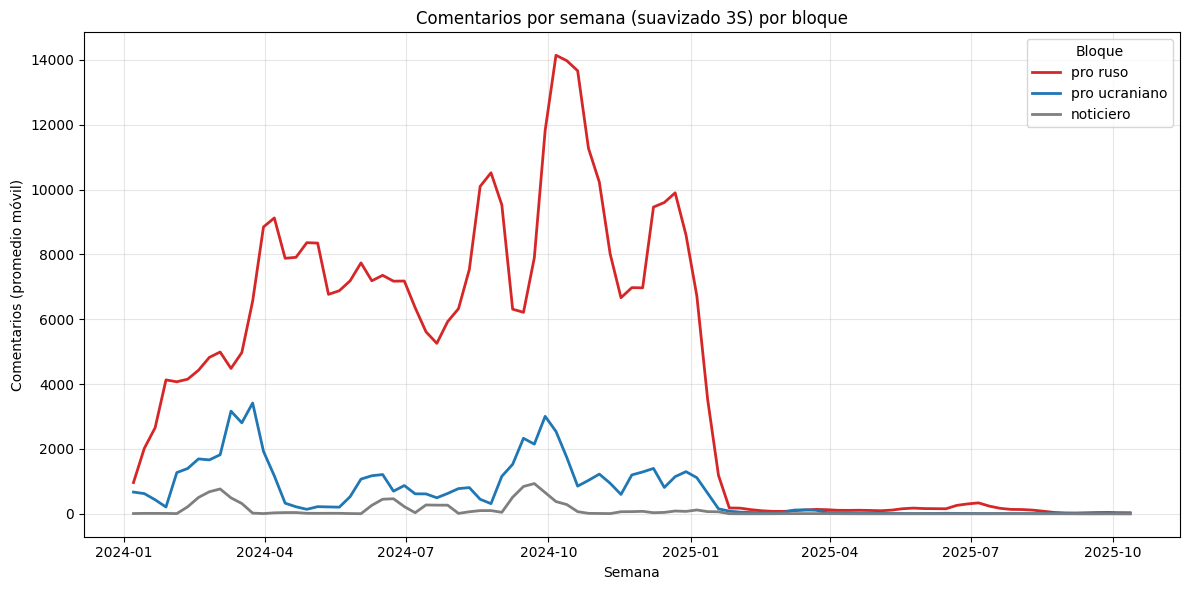

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- 1) asegurar bloque en df_cmt ---
if "condiciones_cuenta" not in df_cmt.columns:
    cond_map = dict(canales_interes)  # tu dict {channel_id: bloque}
    df_cmt = df_cmt.copy()
    df_cmt["condiciones_cuenta"] = df_cmt["channel_id"].map(cond_map)

# filtrar solo bloques conocidos
df_plot = df_cmt[df_cmt["condiciones_cuenta"].isin(["pro-ruso","pro-ucraniano","noticiero"])].copy()

# --- 2) fecha a datetime (UTC) ---
dt = pd.to_datetime(df_plot["comment_time"], errors="coerce", utc=True)
# si vino naive, localízala a UTC
if not getattr(dt.dt, "tz", None):
    dt = dt.dt.tz_localize("UTC")
df_plot["comment_dt"] = dt

# (opcional) acotar a 2024 si quieres
# df_plot = df_plot[(df_plot["comment_dt"] >= "2024-01-01") & (df_plot["comment_dt"] < "2025-01-01")]

# --- 3) agregación semanal por bloque ---
weekly = (df_plot
          .set_index("comment_dt")
          .groupby("condiciones_cuenta")
          .resample("W")                # semana calendario (dominio)
          .size()
          .rename("comments")
          .reset_index())

# pivot para tener columnas por bloque
pv = weekly.pivot(index="comment_dt", columns="condiciones_cuenta", values="comments").fillna(0)
pv = pv.sort_index()

# (opcional) suavizado 3 semanas para legibilidad
pv_smooth = pv.rolling(window=3, min_periods=1).mean()

# --- 4) plot (1 figura, 3 líneas) ---
colors = {
    "pro-ruso": "#d62728",       # rojo
    "pro-ucraniano": "#1f77b4",  # azul
    "noticiero": "#7f7f7f"       # gris
}

plt.figure(figsize=(12,6))
for col in ["pro-ruso", "pro-ucraniano", "noticiero"]:
    if col in pv_smooth.columns:
        plt.plot(pv_smooth.index, pv_smooth[col], label=col.replace("-", " "), linewidth=2, color=colors[col])

plt.title("Comentarios por semana (suavizado 3S) por bloque")
plt.xlabel("Semana")
plt.ylabel("Comentarios (promedio móvil)")
plt.grid(True, alpha=0.3)
plt.legend(title="Bloque")
plt.tight_layout()
plt.show()


In [19]:
import pandas as pd
import numpy as np
import unicodedata
import re

# --- 1) preparar df_meta 2024 ---
assert {'channel_id','channel_title','video_id','video_title','video_published_at'} <= set(df_meta.columns)

dfm = df_meta.copy()
dfm['pub_dt'] = pd.to_datetime(dfm['video_published_at'], errors='coerce', utc=True)
dfm = dfm[(dfm['pub_dt'] >= '2024-01-01') & (dfm['pub_dt'] < '2025-01-01')].copy()

# --- 2) normalizador (quita tildes/acentos y baja a minúsculas) ---
def normalize(s: str) -> str:
    if not isinstance(s, str):
        return ""
    s = unicodedata.normalize('NFKD', s)
    s = ''.join(ch for ch in s if not unicodedata.combining(ch))
    return s.lower()

dfm['title_norm'] = dfm['video_title'].map(normalize)

# --- 3) keywords y patrón regex (sin acentos) ---
ukr_keywords = [
    "ucrania","ucraniana","ucranianos","zelenski","zelensky","zelenskyy",
    "kiev","kyiv","donbas","donbas","crimea","dnipro","odessa","odesa",
    "kharkiv","kherson","mariupol","guerra de ucrania","guerra en ucrania",
    "invasion a ucrania","invasion de ucrania","guerra rusia ucrania",
    "guerra ruso ucraniana","putin","putine","kremlin","rusia","ruso"
]
# escapamos y ordenamos por longitud para que matchee frases antes que tokens cortos
kw_sorted = sorted(set(ukr_keywords), key=len, reverse=True)
kw_pattern = re.compile(r'(' + '|'.join(map(re.escape, kw_sorted)) + r')')

# flags de match y primera keyword detectada
dfm['has_keyword'] = dfm['title_norm'].apply(lambda t: bool(kw_pattern.search(t)))
def first_kw(t):
    m = kw_pattern.search(t)
    return m.group(1) if m else None
dfm['keyword_hit'] = dfm['title_norm'].apply(first_kw)

# --- 4) foco en los dos canales pro-rusos ---
target_channels = {
    'UCBQnW5_C-6Ns6bob5ozacZg': 'Liu Sivaya',
    'UCgms7r9SaeYhuIBaPGOjnhw': 'Miguel Ruiz Calvo',
}
df_tgt = dfm[dfm['channel_id'].isin(target_channels)].copy()
df_tgt['channel_label'] = df_tgt['channel_id'].map(target_channels)
df_tgt['date'] = df_tgt['pub_dt'].dt.tz_convert('UTC').dt.date

# --- 5) conteo diario y promedio por día 2024 ---
daily_counts = (df_tgt.groupby(['channel_label','date']).size()
                .reset_index(name='videos_per_day'))
summary_daily = (daily_counts.groupby('channel_label')['videos_per_day']
                 .agg(['mean','median','max','sum'])
                 .rename(columns={'sum':'videos_2024'}))
# rango de días efectivos (días con al menos 1 vídeo) y sobre todo el año
days_active = daily_counts.groupby('channel_label')['date'].nunique()
days_in_year = 366 if pd.Timestamp('2024-12-31').is_leap_year else 365
summary_daily['days_active'] = days_active
summary_daily['avg_per_active_day'] = (summary_daily['videos_2024'] / summary_daily['days_active']).round(2)
summary_daily['avg_per_calendar_day'] = (summary_daily['videos_2024'] / days_in_year).round(2)
summary_daily = summary_daily.round({'mean':2,'median':2})
display(summary_daily.sort_index())

# --- 6) resumen por mes y por keyword ---
df_tgt['month'] = df_tgt['pub_dt'].dt.to_period('M').astype(str)
per_month = (df_tgt
             .groupby(['channel_label','month'])
             .agg(videos=('video_id','nunique'),
                  with_kw=('has_keyword', 'sum'))
             .reset_index())
per_month['pct_kw'] = (100*per_month['with_kw']/per_month['videos']).round(1)
display(per_month.sort_values(['channel_label','month']))

# --- 7) top ejemplos de títulos (con keyword / sin keyword) ---
def sample_titles(channel, with_kw=True, n=20):
    d = df_tgt[(df_tgt['channel_label']==channel) & (df_tgt['has_keyword']==with_kw)]
    return d[['video_published_at','video_title','keyword_hit']].sort_values('video_published_at').tail(n)

print("\n=== Liu Sivaya — últimos títulos CON keyword ===")
display(sample_titles('Liu Sivaya', True, 20))
print("\n=== Liu Sivaya — últimos títulos SIN keyword ===")
display(sample_titles('Liu Sivaya', False, 20))

print("\n=== Miguel Ruiz Calvo — últimos títulos CON keyword ===")
display(sample_titles('Miguel Ruiz Calvo', True, 20))
print("\n=== Miguel Ruiz Calvo — últimos títulos SIN keyword ===")
display(sample_titles('Miguel Ruiz Calvo', False, 20))

# --- 8) chequeo rápido: ¿cuántos días con >=2 o >=3 vídeos? ---
burst = (daily_counts
         .assign(ge2=lambda d: (d['videos_per_day']>=2).astype(int),
                 ge3=lambda d: (d['videos_per_day']>=3).astype(int))
         .groupby('channel_label')[['ge2','ge3']]
         .sum()
         .rename(columns={'ge2':'days_with_2plus','ge3':'days_with_3plus'}))
display(burst)


,mean,median,max,videos_2024,days_active,avg_per_active_day,avg_per_calendar_day
channel_label,,,,,,,
Liu Sivaya,1.66,2.0,4,580,350,1.66,1.58
Miguel Ruiz Calvo,2.42,2.0,4,886,366,2.42,2.42


C:\Users\User\AppData\Local\Temp\ipykernel_10332\2957558845.py:67: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_tgt['month'] = df_tgt['pub_dt'].dt.to_period('M').astype(str)


,channel_label,month,videos,with_kw,pct_kw
0,Liu Sivaya,2024-01,46,26,56.5
1,Liu Sivaya,2024-02,62,47,75.8
2,Liu Sivaya,2024-03,64,53,82.8
3,Liu Sivaya,2024-04,58,37,63.8
4,Liu Sivaya,2024-05,62,46,74.2
5,Liu Sivaya,2024-06,60,50,83.3
6,Liu Sivaya,2024-07,61,41,67.2
7,Liu Sivaya,2024-08,42,30,71.4
8,Liu Sivaya,2024-09,30,26,86.7
9,Liu Sivaya,2024-10,38,26,68.4



=== Liu Sivaya — últimos títulos CON keyword ===


,video_published_at,video_title,keyword_hit
336,2024-11-29T20:11:35Z,SITUACIÓN CRÍTICA EN SIRIA: LOS ATACANTES ENTR...,ucrania
712,2024-11-30T19:30:11Z,"QUITAN SUS PROPIAS MINAS, ATACAN LAS VÍAS DE C...",ucrania
652,2024-12-01T19:35:55Z,NO HABRÁ SEGUNDAS OPORTUNIDADES: ESTA VEZ EL M...,ruso
473,2024-12-02T20:56:27Z,EXPLOSIONES KILOMÉTRICAS Y CAOS POR DOQUIER: A...,rusia
278,2024-12-04T21:52:07Z,INESPERADO MOVIMIENTO DE RUSIA: OCCIDENTE QUIE...,rusia
656,2024-12-09T21:23:49Z,RESPUESTA RUSA: OCCIDENTE TENDRÁ QUE PAGAR POR...,ucrania
197,2024-12-10T20:53:08Z,RUSIA SE REIRÁ LA ÚLTIMA: CIUDADES ENTERAS ENT...,rusia
589,2024-12-11T20:47:34Z,TREMENDO RIDÍCULO MILITAR DE UCRANIA: SE HUMIL...,ucrania
417,2024-12-12T20:56:13Z,CHINA GOLPEA A UCRANIA: PEKIN HA ACERCADO AÚN ...,ucrania
409,2024-12-15T21:43:17Z,PÁNICO EN UCRANIA: TRIPLE CERCO ENCIERRA A UNA...,ucrania



=== Liu Sivaya — últimos títulos SIN keyword ===


,video_published_at,video_title,keyword_hit
445,2024-10-13T17:29:54Z,LIU SIVAYA VUELVE A RENACER: OJALÁ QUERÁIS ACO...,None
491,2024-10-14T15:13:00Z,ÚLTIMA HORA DESDE MOSCÚ: no estaba del todo pl...,None
257,2024-10-18T15:15:27Z,"🤣 PENSABA QUE YA LO HABÍA VISTO TODO, PEEERO.....",None
543,2024-10-20T18:30:28Z,ESTÁN ACABADOS: lo que la propaganda occidenta...,None
586,2024-10-21T15:20:30Z,🤣 ME PARTO DE LA RISA: ¿esto es la DEMOCRACIA ...,None
320,2024-10-22T18:30:09Z,"ESTREPITOSA DERROTA DE EEUU: LOS ""MEJORES GUER...",None
542,2024-10-25T15:45:43Z,¿Alquien me explica QUÉ ES ESTO? ¿Acaso veis n...,None
636,2024-10-26T18:44:55Z,APÁRTENSE DE SU CAMINO: EL HOMBRE QUE HA CAMBI...,None
203,2024-10-27T19:30:01Z,"""NO PODEMOS MÁS QUE MANDEN UN GRUPO Y NOS SAQU...",None
327,2024-11-04T19:30:01Z,LA DERROTA DE LA OTAN SE HACE EVIDENTE: ASÍ SO...,None



=== Miguel Ruiz Calvo — últimos títulos CON keyword ===


,video_published_at,video_title,keyword_hit
859,2024-12-22T14:07:46Z,DIRECTO URGENTE | AVIÓN EEUU DERRIBADO! ATAQUE...,rusia
1161,2024-12-22T22:12:20Z,DIRECTO URGENTE | PORTAVIONES EN PELIGRO! OTAN...,ucrania
1197,2024-12-23T13:55:46Z,DIRECTO URGENTE | PÁNICO EN LA OTAN: COREA ENV...,rusia
1208,2024-12-23T22:07:09Z,DIRECTO | ATAQUE EN RUSIA: ALERTA ROSTOV! GOLP...,rusia
1160,2024-12-24T12:01:56Z,DIRECTO URGENTE | YEMEN GOLPEA A ISRAEL! PORTA...,rusia
799,2024-12-24T17:48:50Z,DIRECTO | RUSIA ATACÓ A MERCENARIOS OTAN POR N...,rusia
860,2024-12-25T13:53:35Z,DIRECTO URGENTE | ATAQUE MASIVO DE RUSIA! UCRA...,rusia
952,2024-12-25T22:17:33Z,DIRECTO | LA OTAN ATACA BARCO DE RUSIA! PÁNICO...,rusia
1245,2024-12-26T14:16:32Z,DIRECTO URGENTE | RUSIA ATACA Y DERRIBA f-16!!...,rusia
1255,2024-12-26T22:05:40Z,DIRECTO URGENTE | ATAQUE DE YEMEN CONTRA ISRAE...,rusia



=== Miguel Ruiz Calvo — últimos títulos SIN keyword ===


,video_published_at,video_title,keyword_hit
1402,2024-09-30T20:58:43Z,ÚLTIMA HORA: ISRAEL INVADE EL LÍBANO: EMPIEZA ...,None
1303,2024-10-01T17:36:49Z,ÚLTIMA HORA: IRÁN ATACA A ISRAEL CON MISILES |...,None
1000,2024-10-01T20:52:32Z,ÚLTIMA HORA: IRÁN ATACA A ISRAEL CON MÁS DE 40...,None
1193,2024-10-05T20:53:55Z,ÚLTIMA HORA: ALERTA MÁXIMA! ATAQUE INMINENTE: ...,None
897,2024-10-08T12:54:26Z,ÚLTIMA HORA: ISRAEL ES ATACADA! EL MAYOR ATAQU...,None
1348,2024-10-19T21:01:52Z,ÚLTIMA HORA! ISRAEL ES ATACADA EN SÁBADO! FUER...,None
883,2024-10-20T13:07:22Z,ÚLTIMA HORA: ISRAEL ES DERROTADO!! EEUU CORRE ...,None
1347,2024-10-20T21:08:48Z,ÚLTIMA HORA! MÁXIMA TRAGEDIA EN ISRAEL: ALTO C...,None
1443,2024-10-22T21:07:13Z,ÚLTIMA HORA: MÁXIMA TRAGEDIA EN ISRAEL! COMAND...,None
1202,2024-10-23T13:05:43Z,ÚLTIMA HORA: ISRAEL ENTRA EN PÁNICO!! EL PEOR ...,None


,days_with_2plus,days_with_3plus
channel_label,,
Liu Sivaya,204,22
Miguel Ruiz Calvo,358,148


In [20]:
import re, unicodedata
import pandas as pd

def norm(s: str) -> str:
    if not isinstance(s, str): return ""
    s = unicodedata.normalize("NFKD", s)
    s = "".join(ch for ch in s if not unicodedata.combining(ch))
    return s.lower()

def tags_to_text(x):
    if isinstance(x, list): return " ".join(map(str, x))
    return str(x or "")

# --- keywords núcleo ---
KW_UA = {
    "ucrania","ucraniana","ucraniano","ucranianos","ucranianas",
    "kyiv","kiev","donbas","donbass","crimea","dnipro","odesa","odessa",
    "kharkiv","kherson","mariupol","zelenski","zelensky","zelenskyy",
    "guerra de ucrania","guerra en ucrania","guerra rusia ucrania","guerra ruso ucraniana",
    "invasion a ucrania","invasion de ucrania"
}
KW_RU = {"rusia","ruso","rusa","rusos","rusas","kremlin","putin"}
KW_NEG = {  # temas calientes pero NO Ucrania
    "israel","gaza","palestina","libano","liban","iran","irán","sirios","siria",
    "armenia","azerbaiyan","azerbaiyán","taiwan","corea del sur","corea del norte",
    "yemen","eeuu","ee.uu.","otan","kosovo","sahara"
}

def build_pat(words):
    ws = sorted({norm(w) for w in words}, key=len, reverse=True)
    return re.compile(r"(" + "|".join(map(re.escape, ws)) + r")") if ws else None

PAT_UA  = build_pat(KW_UA)
PAT_RU  = build_pat(KW_RU)
PAT_NEG = build_pat(KW_NEG)
PAT_ANY = build_pat(KW_UA | KW_RU)  # Ucrania o Rusia

# --- texto combinado por vídeo ---
dx = df_meta.copy()
dx["title_n"] = dx["video_title"].map(norm)
dx["desc_n"]  = ""  # si guardaste descripción, pon aquí el nombre de la columna y norma
dx["tags_n"]  = dx["video_tags"].apply(tags_to_text).map(norm)
dx["text_all"] = (dx["title_n"] + " " + dx["desc_n"] + " " + dx["tags_n"]).str.strip()

# --- flags ---
dx["ua"]  = dx["text_all"].str.contains(PAT_UA)
dx["ru"]  = dx["text_all"].str.contains(PAT_RU)
dx["neg"] = dx["text_all"].str.contains(PAT_NEG)
dx["any"] = dx["text_all"].str.contains(PAT_ANY)

# Reglas
dx["keep_strict"] = dx["ua"] & (~dx["neg"] | dx["ua"])      # exige UA; deja negativos solo si hay UA
dx["keep_medium"] = (dx["ua"] | dx["ru"]) & (~dx["neg"] | dx["ua"])

# Etiquetas canal (condiciones_cuenta) desde tu diccionario
cond_por_canal = {
    'UCPH3Oz99Y_jrVBCQMjQZNSg': 'pro-ucraniano',
    'UCJQQVLyM6wtPleV4wFBK06g': 'pro-ucraniano',
    'UCnsvJeZO4RigQ898WdDNoBw': 'noticiero',
    'UC7QZIf0dta-XPXsp9Hv4dTw': 'noticiero',
    'UClLLRs_mFTsNT5U-DqTYAGg': 'noticiero',
    'UCGXbLrVe8vnkiFv7q2vYv3w': 'noticiero',
    'UCCJs5mITIqxqJGeFjt9N1Mg': 'noticiero',
    'UCwd8Byi93KbnsYmCcKLExvQ': 'pro-ruso',
    'UCgms7r9SaeYhuIBaPGOjnhw': 'pro-ruso',
    'UCNKomgId0-uTA-vVLM9v1pw': 'pro-ruso',
    'UCBQnW5_C-6Ns6bob5ozacZg': 'pro-ruso'
}
dx["condiciones_cuenta"] = dx["channel_id"].map(cond_por_canal).fillna("desconocido")

# --- resumen por canal para decidir recortes ---
def resumen_por_regla(flag_col: str):
    g = (dx.groupby(["channel_id","channel_title","condiciones_cuenta"], dropna=False)
           .agg(videos_2024=("video_id","nunique"),
                keep_videos=(flag_col,"sum"),
                views_sum=("video_views", "sum"),
                likes_sum=("video_likes", "sum"),
                duration_sum_sec=("video_duration","sum"))
           .reset_index())
    g["pct_keep"] = (100.0 * g["keep_videos"] / g["videos_2024"]).round(1).fillna(0)
    return g.sort_values(["condiciones_cuenta","pct_keep","keep_videos"], ascending=[True, False, False])

res_strict = resumen_por_regla("keep_strict")
res_medium = resumen_por_regla("keep_medium")

print("STRICT (exige UA, negativos solo si hay UA):")
display(res_strict)

print("MEDIUM (RU/UA; descarta negativos si no hay UA):")
display(res_medium)

# Diagnóstico de los dos canales pro-rusos
dx_lr = dx[dx["channel_id"].isin(["UCBQnW5_C-6Ns6bob5ozacZg","UCgms7r9SaeYhuIBaPGOjnhw"])].copy()
diag_lr = (dx_lr
           .assign(only_neg_no_ua=lambda d: d["neg"] & ~d["ua"])
           .groupby(["channel_id","channel_title"], as_index=False)
           .agg(videos=("video_id","nunique"),
                strict=("keep_strict","sum"),
                medium=("keep_medium","sum"),
                only_neg_no_ua=("only_neg_no_ua","sum")))
diag_lr["pct_strict"] = (100*diag_lr["strict"]/diag_lr["videos"]).round(1)
diag_lr["pct_medium"] = (100*diag_lr["medium"]/diag_lr["videos"]).round(1)
display(diag_lr)


STRICT (exige UA, negativos solo si hay UA):


C:\Users\User\AppData\Local\Temp\ipykernel_10332\4274595854.py:46: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  dx["ua"]  = dx["text_all"].str.contains(PAT_UA)
C:\Users\User\AppData\Local\Temp\ipykernel_10332\4274595854.py:47: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  dx["ru"]  = dx["text_all"].str.contains(PAT_RU)
C:\Users\User\AppData\Local\Temp\ipykernel_10332\4274595854.py:48: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  dx["neg"] = dx["text_all"].str.contains(PAT_NEG)
C:\Users\User\AppData\Local\Temp\ipykernel_10332\4274595854.py:49: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  dx["any"] = dx["text_all"].str.contains(PAT_ANY

,channel_id,channel_title,condiciones_cuenta,videos_2024,keep_videos,views_sum,likes_sum,duration_sum_sec,pct_keep
2,UCCJs5mITIqxqJGeFjt9N1Mg,laSexta Noticias,noticiero,2,2,21734,268,125.0,100.0
9,UCnsvJeZO4RigQ898WdDNoBw,EL PAÍS,noticiero,85,78,4310410,122191,43725.0,91.8
0,UC7QZIf0dta-XPXsp9Hv4dTw,RTVE Noticias,noticiero,156,124,5857958,75091,356049.0,79.5
3,UCGXbLrVe8vnkiFv7q2vYv3w,El Mundo,noticiero,16,11,71900,1230,3546.0,68.8
8,UClLLRs_mFTsNT5U-DqTYAGg,La Vanguardia,noticiero,27,17,494290,7292,35532.0,63.0
10,UCwd8Byi93KbnsYmCcKLExvQ,Negocios TV,pro-ruso,2,2,66418,2162,1758.0,100.0
7,UCgms7r9SaeYhuIBaPGOjnhw,Miguel Ruiz Calvo,pro-ruso,886,883,174265888,11951045,1931352.0,99.7
1,UCBQnW5_C-6Ns6bob5ozacZg,Liu Sivaya,pro-ruso,580,575,48358185,4902344,418563.0,99.1
5,UCNKomgId0-uTA-vVLM9v1pw,Intereconomía,pro-ruso,198,162,4702991,170089,25224.0,81.8
4,UCJQQVLyM6wtPleV4wFBK06g,VisualPolitik,pro-ucraniano,53,50,30416995,1147891,62730.0,94.3


MEDIUM (RU/UA; descarta negativos si no hay UA):


,channel_id,channel_title,condiciones_cuenta,videos_2024,keep_videos,views_sum,likes_sum,duration_sum_sec,pct_keep
2,UCCJs5mITIqxqJGeFjt9N1Mg,laSexta Noticias,noticiero,2,2,21734,268,125.0,100.0
9,UCnsvJeZO4RigQ898WdDNoBw,EL PAÍS,noticiero,85,79,4310410,122191,43725.0,92.9
0,UC7QZIf0dta-XPXsp9Hv4dTw,RTVE Noticias,noticiero,156,131,5857958,75091,356049.0,84.0
8,UClLLRs_mFTsNT5U-DqTYAGg,La Vanguardia,noticiero,27,19,494290,7292,35532.0,70.4
3,UCGXbLrVe8vnkiFv7q2vYv3w,El Mundo,noticiero,16,11,71900,1230,3546.0,68.8
10,UCwd8Byi93KbnsYmCcKLExvQ,Negocios TV,pro-ruso,2,2,66418,2162,1758.0,100.0
1,UCBQnW5_C-6Ns6bob5ozacZg,Liu Sivaya,pro-ruso,580,579,48358185,4902344,418563.0,99.8
7,UCgms7r9SaeYhuIBaPGOjnhw,Miguel Ruiz Calvo,pro-ruso,886,883,174265888,11951045,1931352.0,99.7
5,UCNKomgId0-uTA-vVLM9v1pw,Intereconomía,pro-ruso,198,173,4702991,170089,25224.0,87.4
6,UCPH3Oz99Y_jrVBCQMjQZNSg,Memorias de Pez,pro-ucraniano,94,90,22219391,1195059,114965.0,95.7


,channel_id,channel_title,videos,strict,medium,only_neg_no_ua,pct_strict,pct_medium
0,UCBQnW5_C-6Ns6bob5ozacZg,Liu Sivaya,580,575,579,1,99.1,99.8
1,UCgms7r9SaeYhuIBaPGOjnhw,Miguel Ruiz Calvo,886,883,883,3,99.7,99.7


In [21]:
import pandas as pd

# === 1) Config ===
EXCLUIR = {
    "UCwd8Byi93KbnsYmCcKLExvQ",  # Negocios TV
    "UCNKomgId0-uTA-vVLM9v1pw",  # Intereconomía
}

cond_por_canal = {
    'UCPH3Oz99Y_jrVBCQMjQZNSg': 'pro-ucraniano',
    'UCJQQVLyM6wtPleV4wFBK06g': 'pro-ucraniano',
    'UCnsvJeZO4RigQ898WdDNoBw': 'noticiero',
    'UC7QZIf0dta-XPXsp9Hv4dTw': 'noticiero',
    'UClLLRs_mFTsNT5U-DqTYAGg': 'noticiero',
    'UCGXbLrVe8vnkiFv7q2vYv3w': 'noticiero',
    'UCCJs5mITIqxqJGeFjt9N1Mg': 'noticiero',
    'UCwd8Byi93KbnsYmCcKLExvQ': 'pro-ruso',
    'UCgms7r9SaeYhuIBaPGOjnhw': 'pro-ruso',
    'UCNKomgId0-uTA-vVLM9v1pw': 'pro-ruso',
    'UCBQnW5_C-6Ns6bob5ozacZg': 'pro-ruso'
}

# === 2) Filtrar META (videos) ===
df_meta_f = df_meta[~df_meta["channel_id"].isin(EXCLUIR)].copy()
df_meta_f["condiciones_cuenta"] = df_meta_f["channel_id"].map(cond_por_canal).fillna("desconocido")

videos_por_bando = (df_meta_f
    .groupby("condiciones_cuenta", dropna=False)["video_id"]
    .nunique()
    .reset_index(name="videos"))

# === 3) Filtrar COMMENTS (comentarios) ===
df_cmt_f = df_cmt[~df_cmt["channel_id"].isin(EXCLUIR)].copy()
df_cmt_f["condiciones_cuenta"] = df_cmt_f["channel_id"].map(cond_por_canal).fillna("desconocido")

comentarios_por_bando = (df_cmt_f
    .groupby("condiciones_cuenta", dropna=False)
    .size()
    .reset_index(name="comentarios"))

# === 4) Unir y ordenar ===
resumen_bando = (videos_por_bando
    .merge(comentarios_por_bando, on="condiciones_cuenta", how="outer")
    .fillna(0)
    .astype({"videos": int, "comentarios": int})
    .sort_values(["condiciones_cuenta"])
    .reset_index(drop=True))

print("Resumen por bando (excluyendo Negocios TV e Intereconomía):")
display(resumen_bando)

# (Opcional) ratios rápidos
if "videos" in resumen_bando and "comentarios" in resumen_bando:
    resumen_bando["comentarios_por_video"] = (
        (resumen_bando["comentarios"] / resumen_bando["videos"].where(resumen_bando["videos"]>0, pd.NA))
        .round(1)
    )
    print("Con ratio comentarios/video:")
    display(resumen_bando)


Resumen por bando (excluyendo Negocios TV e Intereconomía):


,condiciones_cuenta,videos,comentarios
0,noticiero,286,10216
1,pro-ruso,1466,398129
2,pro-ucraniano,147,62261


Con ratio comentarios/video:


,condiciones_cuenta,videos,comentarios,comentarios_por_video
0,noticiero,286,10216,35.7
1,pro-ruso,1466,398129,271.6
2,pro-ucraniano,147,62261,423.5


In [22]:
por_canal = (df_cmt_f
    .groupby(["condiciones_cuenta","channel_title","channel_id"], dropna=False)
    .size().reset_index(name="comentarios"))
por_canal = por_canal.merge(
    df_meta_f.groupby(["channel_id","channel_title"], dropna=False)["video_id"].nunique().reset_index(name="videos"),
    on=["channel_id","channel_title"],
    how="left"
).sort_values(["condiciones_cuenta","comentarios"], ascending=[True, False])
display(por_canal.head(50))


,condiciones_cuenta,channel_title,channel_id,comentarios,videos
3,noticiero,RTVE Noticias,UC7QZIf0dta-XPXsp9Hv4dTw,7813,156
0,noticiero,EL PAÍS,UCnsvJeZO4RigQ898WdDNoBw,1357,85
2,noticiero,La Vanguardia,UClLLRs_mFTsNT5U-DqTYAGg,854,27
1,noticiero,El Mundo,UCGXbLrVe8vnkiFv7q2vYv3w,192,16
5,pro-ruso,Miguel Ruiz Calvo,UCgms7r9SaeYhuIBaPGOjnhw,273584,886
4,pro-ruso,Liu Sivaya,UCBQnW5_C-6Ns6bob5ozacZg,124545,580
7,pro-ucraniano,VisualPolitik,UCJQQVLyM6wtPleV4wFBK06g,40619,53
6,pro-ucraniano,Memorias de Pez,UCPH3Oz99Y_jrVBCQMjQZNSg,21642,94


In [23]:
import os
import pandas as pd
from collections import OrderedDict

# === 1) canales finales (depurados) ===
canales_interes = OrderedDict({
    'UCPH3Oz99Y_jrVBCQMjQZNSg': 'pro-ucraniano',  # Memorias de Pez
    'UCJQQVLyM6wtPleV4wFBK06g': 'pro-ucraniano',  # VisualPolitik
    'UCnsvJeZO4RigQ898WdDNoBw': 'noticiero',      # El País
    'UC7QZIf0dta-XPXsp9Hv4dTw': 'noticiero',      # RTVE Noticias
    'UClLLRs_mFTsNT5U-DqTYAGg': 'noticiero',      # La Vanguardia
    'UCGXbLrVe8vnkiFv7q2vYv3w': 'noticiero',      # El Mundo
    # 'UCCJs5mITIqxqJGeFjt9N1Mg': 'noticiero',    # laSexta Noticias (sin comentarios)
    # 'UCwd8Byi93KbnsYmCcKLExvQ': 'pro-ruso',     # Negocios TV
    # 'UCgms7r9SaeYhuIBaPGOjnhw': 'pro-ruso',     # Miguel Ruiz Calvo
    # 'UCNKomgId0-uTA-vVLM9v1pw': 'pro-ruso',     # Intereconomía
    'UCBQnW5_C-6Ns6bob5ozacZg': 'pro-ruso'        # Liu Sivaya
})
cond_por_canal = dict(canales_interes)
canales_keep = set(canales_interes.keys())

# === 2) rutas de salida (junto a las originales) ===
OUT_DIR = "./data_rebuild"
os.makedirs(OUT_DIR, exist_ok=True)
F_VIDEOS_MASTER_ORIG = os.path.join(OUT_DIR, "videos_por_canal_2024_ukraine.csv")  # referencia
F_VIDEOS_FILTRADO    = os.path.join(OUT_DIR, "videos_master_filtrado_7canales.csv")
F_COMMENTS_ORIG_TMP  = os.path.join(OUT_DIR, "comments_top_level_tmp.csv")         # referencia
F_COMMENTS_FILTRADO  = os.path.join(OUT_DIR, "comments_top_level_filtrado_7canales.csv")

# === 3) FILTRAR VIDEOS (mantener columnas y orden EXACTO) ===
assert isinstance(df_meta, pd.DataFrame) and not df_meta.empty, "df_meta no está en memoria o está vacío."
cols_meta = list(df_meta.columns)  # mantener orden exacto del master actual
df_meta_filtrado = df_meta[df_meta["channel_id"].isin(canales_keep)].copy()

# Sanidad mínima no intrusiva:
# - asegurar que 'condiciones_cuenta' refleje el diccionario (si existe esa columna)
if "condiciones_cuenta" in df_meta_filtrado.columns:
    df_meta_filtrado["condiciones_cuenta"] = df_meta_filtrado["channel_id"].map(cond_por_canal).fillna(df_meta_filtrado["condiciones_cuenta"])

# - asegurar tipos numéricos suaves (sin cambiar nombres ni agregar columnas)
for col_int in ("video_views","video_likes","video_category_id","subscriber_count"):
    if col_int in df_meta_filtrado.columns:
        df_meta_filtrado[col_int] = pd.to_numeric(df_meta_filtrado[col_int], errors="coerce").fillna(0).astype(int)
if "video_duration" in df_meta_filtrado.columns:
    df_meta_filtrado["video_duration"] = pd.to_numeric(df_meta_filtrado["video_duration"], errors="coerce")

# Guardar con el MISMO orden de columnas del master
df_meta_filtrado[cols_meta].to_csv(F_VIDEOS_FILTRADO, index=False)

print(f"✅ Videos filtrados guardados en: {F_VIDEOS_FILTRADO}")
print("  · videos totales (orig):", df_meta["video_id"].nunique())
print("  · videos filtrados     :", df_meta_filtrado["video_id"].nunique())
print(df_meta_filtrado.groupby(["channel_title"], dropna=False)["video_id"].nunique().sort_values(ascending=False))


✅ Videos filtrados guardados en: ./data_rebuild\videos_master_filtrado_7canales.csv
  · videos totales (orig): 2099
  · videos filtrados     : 1011
channel_title
Liu Sivaya         580
RTVE Noticias      156
Memorias de Pez     94
EL PAÍS             85
VisualPolitik       53
La Vanguardia       27
El Mundo            16
Name: video_id, dtype: int64


In [24]:

print(f"\n✅ Comentarios filtrados guardados en: {F_COMMENTS_FILTRADO}")
print("  · comentarios totales (orig):", len(df_cmt))
print("  · comentarios filtrados     :", len(df_cmt_filtrado))
print(df_cmt_filtrado.groupby(["channel_title"], dropna=False).size().sort_values(ascending=False).head(20))


✅ Comentarios filtrados guardados en: ./data_rebuild\comments_top_level_filtrado_7canales.csv
  · comentarios totales (orig): 472398


NameError: name 'df_cmt_filtrado' is not defined

In [25]:
import pandas as pd
import os

# === rutas de trabajo (ajusta si tus archivos tienen otro nombre) ===
OUT_DIR = "./data_rebuild"
F_VIDEOS_MASTER = os.path.join(OUT_DIR, "videos_por_canal_2024_ukraine.csv")   # master de vídeos
F_COMMENTS      = os.path.join(OUT_DIR, "comments_top_level_tmp.csv")          # comentarios ya extraídos (tmp o final)

# === canales a excluir ===
EXCLUDE_CHANNELS = {
    "UCwd8Byi93KbnsYmCcKLExvQ",  # Negocios TV
    "UCNKomgId0-uTA-vVLM9v1pw",  # Intereconomía
    "UCgms7r9SaeYhuIBaPGOjnhw",  # Miguel Ruiz Calvo
}

# === carga segura ===
def _load_csv(path):
    if not os.path.exists(path):
        raise FileNotFoundError(f"No encontré el archivo: {path}")
    return pd.read_csv(path)

df_videos = _load_csv(F_VIDEOS_MASTER)
df_cmt    = _load_csv(F_COMMENTS)

# === chequeos mínimos de columnas ===
for name, df, cols in [
    ("videos", df_videos, {"channel_id", "video_id", "channel_title"}),
    ("comments", df_cmt, {"channel_id"})
]:
    missing = cols - set(df.columns)
    if missing:
        raise KeyError(f"Faltan columnas en {name}: {missing}")

# === resumen antes ===
print("=== ANTES ===")
print("Videos -> filas:", len(df_videos), "| canales únicos:", df_videos["channel_id"].nunique())
print("Comments -> filas:", len(df_cmt), "| canales únicos:", df_cmt["channel_id"].nunique())

print("\nTop canales por #videos (antes):")
print(df_videos["channel_id"].value_counts().head(10))

print("\nTop canales por #comments (antes):")
print(df_cmt["channel_id"].value_counts().head(10))

# === filtrar exclusiones ===
mask_v = ~df_videos["channel_id"].isin(EXCLUDE_CHANNELS)
mask_c = ~df_cmt["channel_id"].isin(EXCLUDE_CHANNELS)

df_videos_excluded = df_videos[mask_v].copy()
df_cmt_excluded    = df_cmt[mask_c].copy()

# === resumen después ===
print("\n=== DESPUÉS (excluidos Negocios TV, Intereconomía, Miguel Ruiz Calvo) ===")
print("Videos -> filas:", len(df_videos_excluded), "| canales únicos:", df_videos_excluded["channel_id"].nunique(),
      "| removidos:", len(df_videos) - len(df_videos_excluded))

print("Comments -> filas:", len(df_cmt_excluded), "| canales únicos:", df_cmt_excluded["channel_id"].nunique(),
      "| removidos:", len(df_cmt) - len(df_cmt_excluded))

print("\nTop canales por #videos (después):")
print(df_videos_excluded["channel_id"].value_counts().head(10))

print("\nTop canales por #comments (después):")
print(df_cmt_excluded["channel_id"].value_counts().head(10))

# === (opcional) vista rápida por bloque pro/neutral/pro-ruso si ya tenías esa etiqueta en df_videos ===
if "bloque" in df_videos_excluded.columns:
    print("\nVideos por bloque:")
    print(df_videos_excluded.groupby("bloque")["video_id"].nunique())

# df_videos_excluded y df_cmt_excluded quedan en memoria para seguir trabajando sin guardar todavía.


=== ANTES ===
Videos -> filas: 2099 | canales únicos: 11
Comments -> filas: 472398 | canales únicos: 10

Top canales por #videos (antes):
channel_id
UCgms7r9SaeYhuIBaPGOjnhw    886
UCBQnW5_C-6Ns6bob5ozacZg    580
UCNKomgId0-uTA-vVLM9v1pw    198
UC7QZIf0dta-XPXsp9Hv4dTw    156
UCPH3Oz99Y_jrVBCQMjQZNSg     94
UCnsvJeZO4RigQ898WdDNoBw     85
UCJQQVLyM6wtPleV4wFBK06g     53
UClLLRs_mFTsNT5U-DqTYAGg     27
UCGXbLrVe8vnkiFv7q2vYv3w     16
UCCJs5mITIqxqJGeFjt9N1Mg      2
Name: count, dtype: int64

Top canales por #comments (antes):
channel_id
UCgms7r9SaeYhuIBaPGOjnhw    273584
UCBQnW5_C-6Ns6bob5ozacZg    124545
UCJQQVLyM6wtPleV4wFBK06g     40619
UCPH3Oz99Y_jrVBCQMjQZNSg     21642
UC7QZIf0dta-XPXsp9Hv4dTw      7813
UCNKomgId0-uTA-vVLM9v1pw      1674
UCnsvJeZO4RigQ898WdDNoBw      1357
UClLLRs_mFTsNT5U-DqTYAGg       854
UCGXbLrVe8vnkiFv7q2vYv3w       192
UCwd8Byi93KbnsYmCcKLExvQ       118
Name: count, dtype: int64

=== DESPUÉS (excluidos Negocios TV, Intereconomía, Miguel Ruiz Calvo) ===
Videos 

In [26]:
import pandas as pd, os, numpy as np

# === rutas ===
OUT_DIR = "./data_rebuild"
F_VIDEOS_MASTER = os.path.join(OUT_DIR, "videos_por_canal_2024_ukraine.csv")
F_COMMENTS      = os.path.join(OUT_DIR, "comments_top_level_tmp.csv")

# === canales a excluir globalmente (como en el paso anterior) ===
EXCLUDE_CHANNELS = {
    "UCwd8Byi93KbnsYmCcKLExvQ",  # Negocios TV
    "UCNKomgId0-uTA-vVLM9v1pw",  # Intereconomía
    "UCgms7r9SaeYhuIBaPGOjnhw",  # Miguel Ruiz Calvo
}
LIU_CH = "UCBQnW5_C-6Ns6bob5ozacZg"

# === carga ===
df_meta = pd.read_csv(F_VIDEOS_MASTER)
df_cmt  = pd.read_csv(F_COMMENTS)

# --- quitamos canales excluidos (como ya hicimos) ---
df_meta_base = df_meta[~df_meta["channel_id"].isin(EXCLUDE_CHANNELS)].copy()
df_cmt_base  = df_cmt[~df_cmt["channel_id"].isin(EXCLUDE_CHANNELS)].copy()

# --- palabras clave ---
# Ucrania/Rusia (mínimo)
KW_UR = {
    "ucrania","ucraniana","ucranianos","zelenski","zelensky","zelenskyy","zelenskiy",
    "kiev","kyiv","donbas","donbás","crimea","dnipro","odessa","odesa",
    "kharkiv","jersón","kherson","mariúpol","mariupol",
    "rusia","ruso","putin","kremlin","moscú","moscu",  # añadimos moscú/moscú
}
# Medio Oriente (ME-only candidates)
KW_ME = {
    "israel","hezbolá","hezbola","hezbollah","hamas","gaza","cisjordania",
    "irán","iran","teherán","teheran","lí­bano","libano","líbano","libanés","libanes",
    "hizbulá","hizbula","hizbullah","netanyahu","idf","tel aviv","jerusalén","jerusalen",
    "yemen","hutíes","huthis","houthi","hezb",  # variantes
}

def norm(s):
    return (s or "").lower()

def is_ukr_rus_in_title_desc(title, desc):
    txt = f"{norm(title)} {norm(desc)}"
    return any(k in txt for k in KW_UR)

def has_me_only(title, desc):
    txt = f"{norm(title)} {norm(desc)}"
    has_me = any(k in txt for k in KW_ME)
    has_ur = any(k in txt for k in KW_UR)
    return has_me and not has_ur

# --- reconstruimos "relevancia" para Liu: SOLO título+descripción (ignoramos tags) ---
is_liu = df_meta_base["channel_id"].eq(LIU_CH)

# flags para Liu
liu_has_ur = df_meta_base.loc[is_liu, ["video_title","_video_description_for_filter" if "_video_description_for_filter" in df_meta_base.columns else "video_description" if "video_description" in df_meta_base.columns else "video_title"]].apply(
    lambda row: is_ukr_rus_in_title_desc(row.iloc[0], row.iloc[1] if len(row)>1 else ""), axis=1
).rename("liu_has_ur")

# necesitamos de nuevo title/desc para el segundo flag
def _row_me_only(row):
    title = row.get("video_title", "")
    desc  = row.get("_video_description_for_filter", row.get("video_description",""))
    return has_me_only(title, desc)

liu_me_only = df_meta_base.loc[is_liu].apply(_row_me_only, axis=1).rename("liu_me_only")

# dataframe con flags solo para Liu
liu_flags = pd.concat([df_meta_base.loc[is_liu, ["video_id","channel_id","video_title"]].reset_index(drop=True),
                       liu_has_ur.reset_index(drop=True),
                       liu_me_only.reset_index(drop=True)], axis=1)

# regla final Liu: mantener si (liu_has_ur == True) y (liu_me_only == False)
liu_keep_ids = set(liu_flags.loc[liu_flags["liu_has_ur"] & (~liu_flags["liu_me_only"]), "video_id"].astype(str))
liu_drop_ids = set(df_meta_base.loc[is_liu, "video_id"].astype(str)) - liu_keep_ids

print(f"[Preview] Liu Sivaya vídeos totales en meta-base: {is_liu.sum()}")
print(f"[Preview] Liu Sivaya a DESCARTAR por regla nueva: {len(liu_drop_ids)}")
print(f"[Preview] Liu Sivaya a MANTENER: {len(liu_keep_ids)}")

# --- aplicar virtualmente el filtro a META (solo para preview) ---
df_meta_preview = df_meta_base[~(df_meta_base["video_id"].astype(str).isin(liu_drop_ids))].copy()

# --- y a COMMENTS: preferentemente por video_id; si no existe, caemos a título (menos fiable) ---
if "video_id" in df_cmt_base.columns:
    df_cmt_preview = df_cmt_base[~df_cmt_base["video_id"].astype(str).isin(liu_drop_ids)].copy()
else:
    # fallback por título
    drop_titles = set(df_meta_base.loc[df_meta_base["video_id"].astype(str).isin(liu_drop_ids), "video_title"].astype(str))
    df_cmt_preview = df_cmt_base[~df_cmt_base["video_title"].astype(str).isin(drop_titles)].copy()

# --- resúmenes ---
print("\n=== Resumen Preview (sin guardar) ===")
print("Videos (antes) :", len(df_meta_base), " | (después) :", len(df_meta_preview),
      " | removidos:", len(df_meta_base) - len(df_meta_preview))
print("Comments (antes):", len(df_cmt_base),  " | (después):", len(df_cmt_preview),
      " | removidos:", len(df_cmt_base) - len(df_cmt_preview))

print("\nPor canal (vídeos) — Top 10 después del filtro Liu:")
print(df_meta_preview["channel_id"].value_counts().head(10))

print("\nPor canal (comentarios) — Top 10 después del filtro Liu:")
print(df_cmt_preview["channel_id"].value_counts().head(10))

# Dejamos df_meta_preview y df_cmt_preview en memoria para el paso B si confirmas.


[Preview] Liu Sivaya vídeos totales en meta-base: 580
[Preview] Liu Sivaya a DESCARTAR por regla nueva: 149
[Preview] Liu Sivaya a MANTENER: 431

=== Resumen Preview (sin guardar) ===
Videos (antes) : 1013  | (después) : 864  | removidos: 149
Comments (antes): 197022  | (después): 164635  | removidos: 32387

Por canal (vídeos) — Top 10 después del filtro Liu:
channel_id
UCBQnW5_C-6Ns6bob5ozacZg    431
UC7QZIf0dta-XPXsp9Hv4dTw    156
UCPH3Oz99Y_jrVBCQMjQZNSg     94
UCnsvJeZO4RigQ898WdDNoBw     85
UCJQQVLyM6wtPleV4wFBK06g     53
UClLLRs_mFTsNT5U-DqTYAGg     27
UCGXbLrVe8vnkiFv7q2vYv3w     16
UCCJs5mITIqxqJGeFjt9N1Mg      2
Name: count, dtype: int64

Por canal (comentarios) — Top 10 después del filtro Liu:
channel_id
UCBQnW5_C-6Ns6bob5ozacZg    92158
UCJQQVLyM6wtPleV4wFBK06g    40619
UCPH3Oz99Y_jrVBCQMjQZNSg    21642
UC7QZIf0dta-XPXsp9Hv4dTw     7813
UCnsvJeZO4RigQ898WdDNoBw     1357
UClLLRs_mFTsNT5U-DqTYAGg      854
UCGXbLrVe8vnkiFv7q2vYv3w      192
Name: count, dtype: int64


In [27]:
# nombres de salida
F_VIDEOS_REFINED  = os.path.join(OUT_DIR, "videos_master_refinado_ukraine_rules.csv")
F_COMMENTS_REFINED = os.path.join(OUT_DIR, "comments_top_level_refinado_ukraine_rules.csv")

# guardado
df_meta_preview.to_csv(F_VIDEOS_REFINED, index=False)
df_cmt_preview.to_csv(F_COMMENTS_REFINED, index=False)

print("✅ Guardados:")
print("  ", F_VIDEOS_REFINED)
print("  ", F_COMMENTS_REFINED)


✅ Guardados:
   ./data_rebuild\videos_master_refinado_ukraine_rules.csv
   ./data_rebuild\comments_top_level_refinado_ukraine_rules.csv
